In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

character(0)

# 3 Hands On: Data Exploration
## 1 Summarization
## Load the data set carIns final. It already has the imputation of missing values.
### 1. Using the package dplyr, answer the following questions:

In [14]:
# Cargar el archivo .Rdata
load("/kaggle/input/carlns-final/carIns_final.Rdata")

#usamos el package dplyr para eso llamamos a la libreria siguiente
library(dplyr)


In [20]:
# Mostrar las primeras filas del conjunto de datos
head(carIns_final, 10)


symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,161,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
1,158,audi,gas,std,four,sedan,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
1,161,audi,gas,std,four,wagon,fwd,front,105.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,⋯,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875


### (a) Obtain the number of cars by bodyStyle

In [17]:
# Obtener el número de autos por bodyStyle
numero_autos_por_bodyStyle <- carIns_final %>% group_by(bodyStyle) %>% count()

numero_autos_por_bodyStyle


bodyStyle,n
<fct>,<int>
convertible,6
hardtop,8
hatchback,70
sedan,96
wagon,25


### (b) Obtain the number of cars by bodyStyle and fuelType

In [18]:
# Obtener el número de autos por bodyStyle y fuelType
numero_autos_por_bodyStyle_fuelType <- carIns_final %>% group_by(bodyStyle, fuelType) %>% count()

numero_autos_por_bodyStyle_fuelType

bodyStyle,fuelType,n
<fct>,<fct>,<int>
convertible,gas,6
hardtop,diesel,1
hardtop,gas,7
hatchback,diesel,1
hatchback,gas,69
sedan,diesel,15
sedan,gas,81
wagon,diesel,3
wagon,gas,22


### (c) Obtain the mean and the standard deviation of the attribute cityMpg by bodyStyle in ascending order.

In [21]:
# Calcular la media y la desviación estándar de cityMpg por bodyStyle en orden ascendente
carIns_final %>% group_by(bodyStyle) %>%
                summarize(mean_cityMpg = mean(cityMpg),
                sd_cityMpg = sd(cityMpg)) %>%
              arrange(mean_cityMpg)


bodyStyle,mean_cityMpg,sd_cityMpg
<fct>,<dbl>,<dbl>
convertible,20.50000,3.391165
hardtop,21.62500,5.423165
wagon,24.04000,4.217819
sedan,25.32292,6.599035
hatchback,26.31429,7.169870


### (d) Also by bodyStyle, and for the attributes cityMpg and highwayMpg, obtain the mean, the standard deviation, the median and the inter-quartile range.

In [22]:
# Calcular la media, desviación estándar, mediana y rango intercuartílico de cityMpg y highwayMpg por bodyStyle
carIns_final %>%
  group_by(bodyStyle) %>%
  summarize(mean_cityMpg = mean(cityMpg),
            sd_cityMpg = sd(cityMpg),
            median_cityMpg = median(cityMpg),
            IQR_cityMpg = IQR(cityMpg),
            mean_highwayMpg = mean(highwayMpg),
            sd_highwayMpg = sd(highwayMpg),
            median_highwayMpg = median(highwayMpg),
            IQR_highwayMpg = IQR(highwayMpg))


bodyStyle,mean_cityMpg,sd_cityMpg,median_cityMpg,IQR_cityMpg,mean_highwayMpg,sd_highwayMpg,median_highwayMpg,IQR_highwayMpg
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
convertible,20.50000,3.391165,21,5.25,26.00000,4.289522,27.0,3.00
hardtop,21.62500,5.423165,23,7.00,27.25000,6.088631,27.5,5.00
hatchback,26.31429,7.169870,26,12.00,32.17143,7.044314,31.5,11.75
sedan,25.32292,6.599035,25,11.25,30.83333,7.174027,30.5,11.25
wagon,24.04000,4.217819,24,5.00,28.72000,4.703899,29.0,7.00


## 2 Visualization
## 2. Using the package ggplot2, create graphs that you find adequate to answer the following questions.


In [24]:
library(ggplot2)

### (e) Show the relationship between the attributes cityMpg and highwayMpg

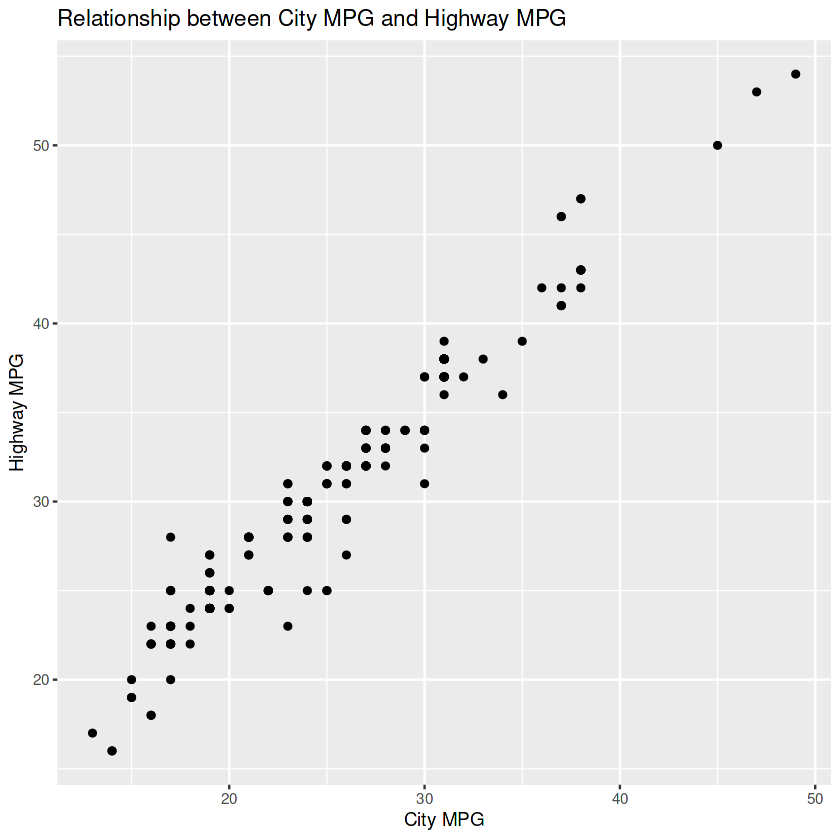

In [25]:


# Crear un diagrama de dispersión de cityMpg vs. highwayMpg
ggplot(carIns_final, aes(x = cityMpg, y = highwayMpg)) +
  geom_point() +
  xlab("City MPG") +
  ylab("Highway MPG") +
  ggtitle("Relationship between City MPG and Highway MPG")


### (f) Show the distribution of cars by bodyStyle.

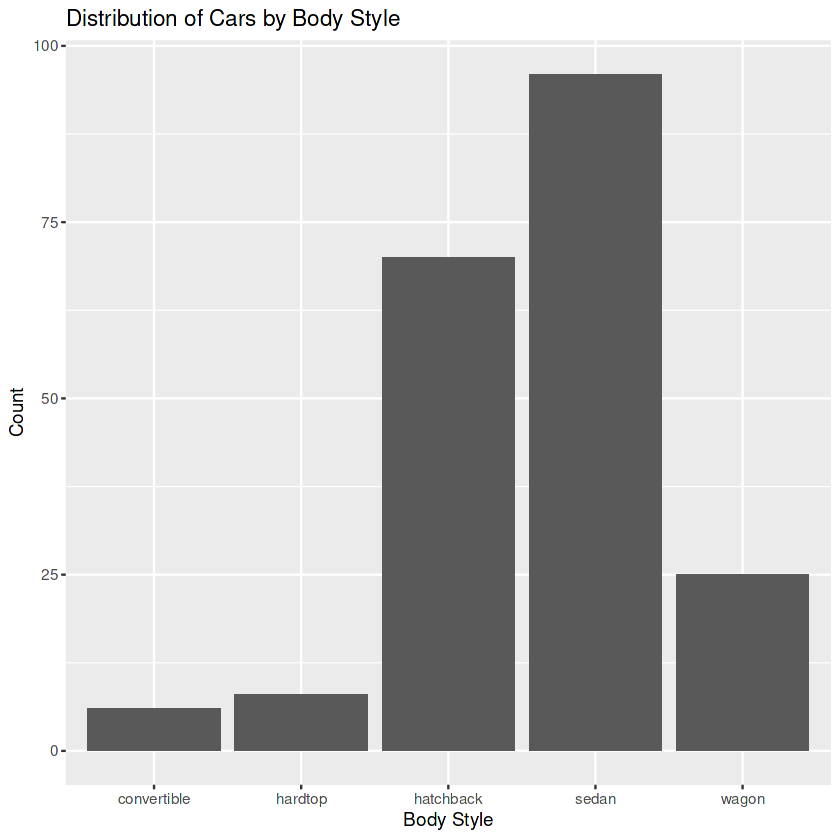

In [26]:
# Crear un gráfico de barras de la distribución de cars por bodyStyle
ggplot(carIns_final, aes(x = bodyStyle)) +
  geom_bar() +
  xlab("Body Style") +
  ylab("Count") +
  ggtitle("Distribution of Cars by Body Style")


### (g) Show the distribution of cars by price. Suggestion: create bins of width equal to 5000.

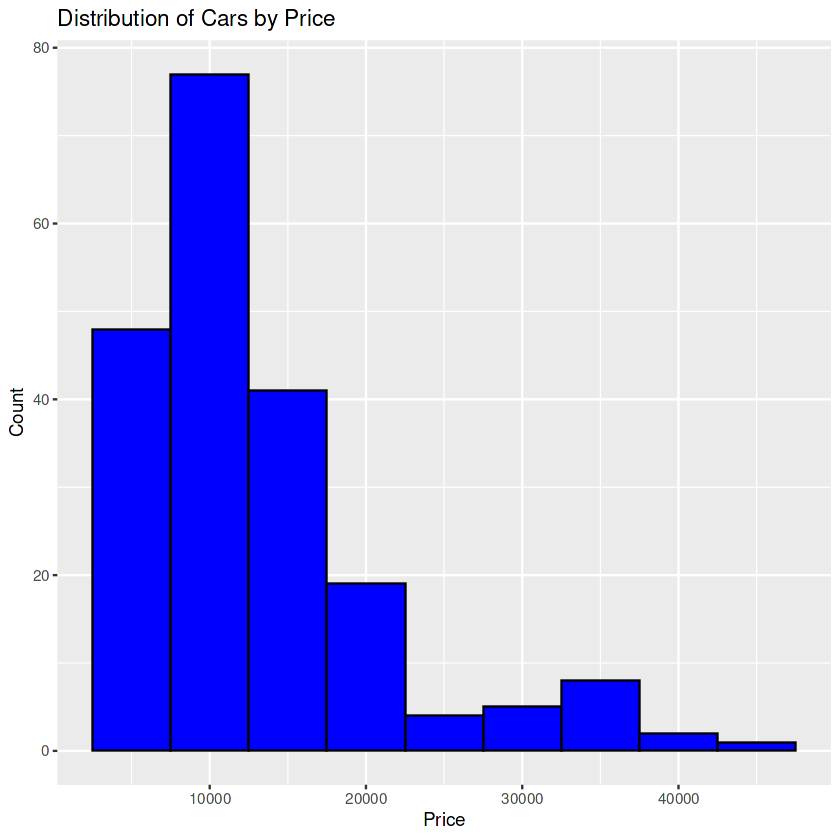

In [37]:
# Crear un histograma de la distribución de cars por precio


ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, fill = "blue", color = "black") +
  labs(title = "Distribution of Cars by Price", x = "Price", y = "Count")


### (h) Add the information of the density estimation to the previous graph

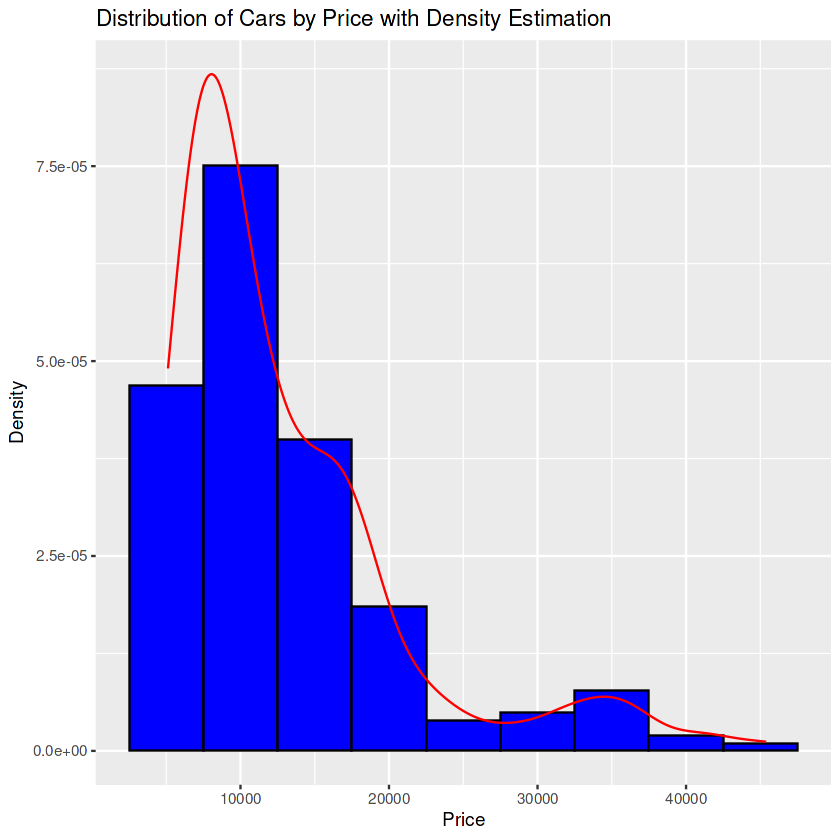

In [38]:
# Crear un histograma de la distribución de cars por precio con estimación de densidad
ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, fill = "blue", color = "black", aes(y = ..density..)) +
  geom_density(alpha = 0.2, color = "red") +
  labs(title = "Distribution of Cars by Price with Density Estimation", x = "Price", y = "Density")

### (i) Check (visually) if it is plausible to consider that price follows a normal distribution.


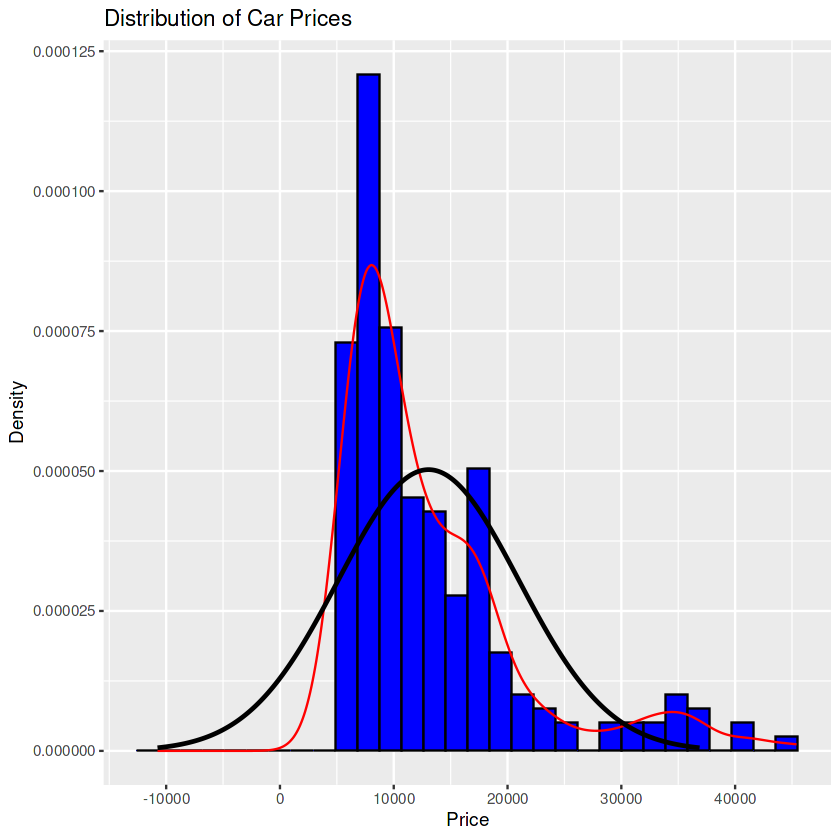

In [44]:
# Subconjunto de los datos para eliminar los valores faltantes
carIns_subset <- carIns_final %>% filter(!is.na(price))

# calculamos la media y la desviacion estandar del precio
price_mean <- mean(carIns_subset$price)
price_sd <- sd(carIns_subset$price)

# Generar una curva de distribución normal basada en la media y la desviación estándar
price_normal_dist <- data.frame(price = seq(price_mean - 3*price_sd, price_mean + 3*price_sd, length.out = 1000))
price_normal_dist$density <- dnorm(price_normal_dist$price, mean = price_mean, sd = price_sd)

# crear un histograma de la densidad y de la curva de distribucion normal
ggplot() +
  geom_histogram(data = carIns_subset, aes(x = price, y = ..density..), fill = "blue", color = "black", bins = 30) +
  geom_density(data = carIns_subset, aes(x = price), color = "red") +
  geom_line(data = price_normal_dist, aes(x = price, y = density), color = "black", size = 1) +
  labs(title = "Distribution of Car Prices", x = "Price", y = "Density")

### (j) Show the distribution of price by make attribute. Suggestion: use boxplots and the function coord_flip().

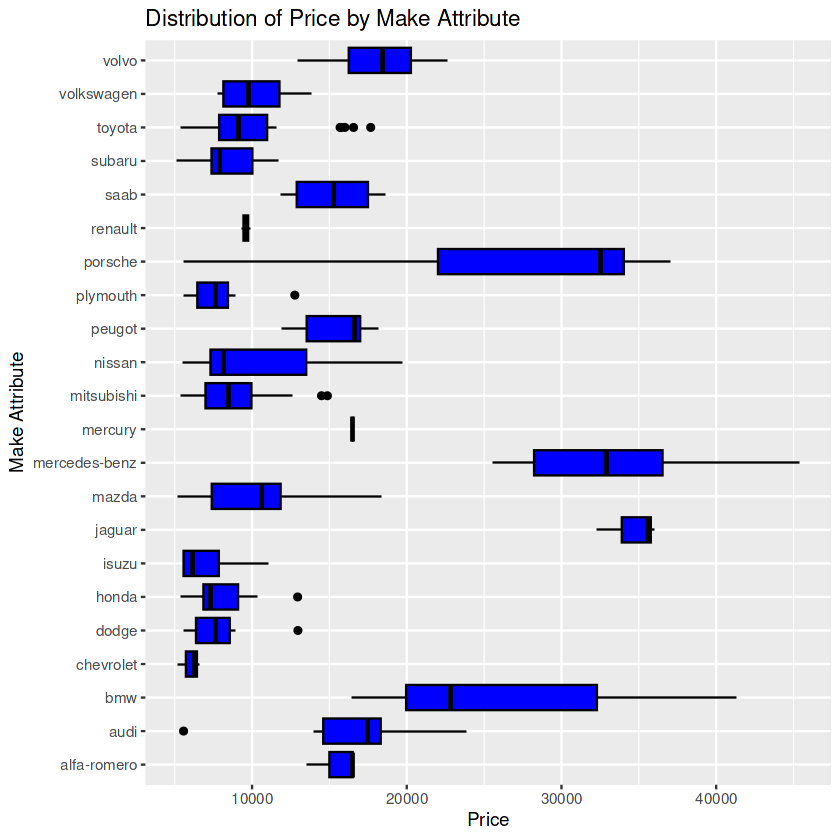

In [47]:

ggplot(carIns_final, aes(x = make, y = price)) +
  geom_boxplot(fill = "blue", color = "black") +
  coord_flip() +
  labs(title = "Distribution of Price by Make Attribute", x = "Make Attribute", y = "Price")

### (k) Show the distribution of price by nDoors attribute. Suggestion: use histograms.

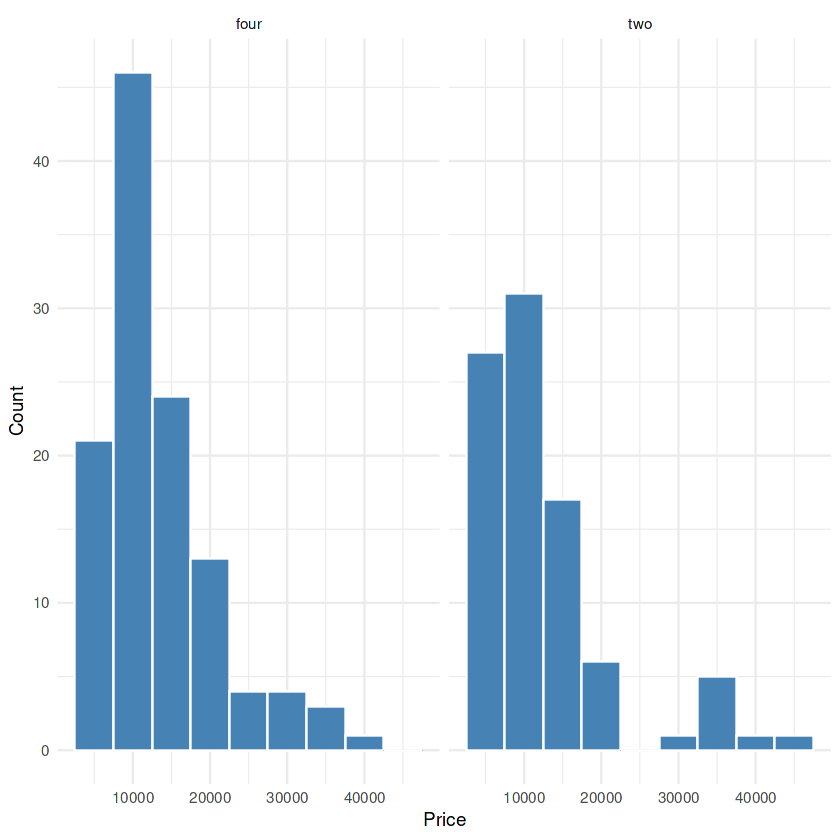

In [51]:
# Histograma con distribución de precios por el atributo "nDoors"
ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, fill = "steelblue", color = "white") +
  facet_wrap(~nDoors, nrow = 1) +
  labs(x = "Price", y = "Count") +
  theme_minimal()


### (l) Show the distribution of price by bodyStyle and nDoors attributes. Suggestion: use histograms.

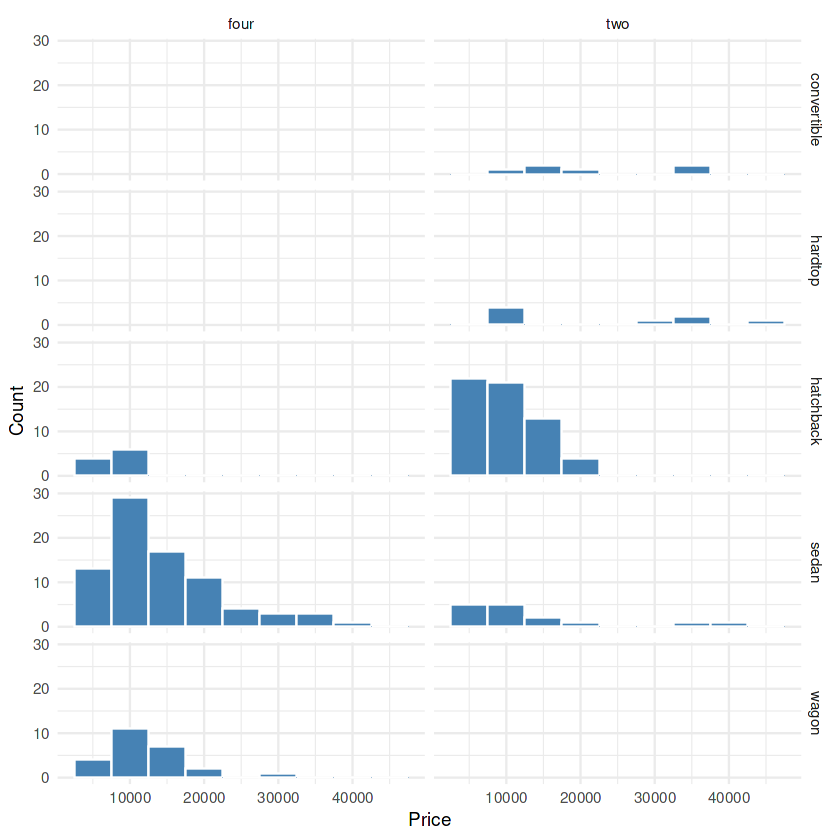

In [52]:
# Histograma con distribución de precios por los atributos "bodyStyle" y "nDoors"
ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, fill = "steelblue", color = "white") +
  facet_grid(bodyStyle ~ nDoors) +
  labs(x = "Price", y = "Count") +
  theme_minimal()


### (m) Add the parameter scales="free_y" to the facet function in the previous graph.

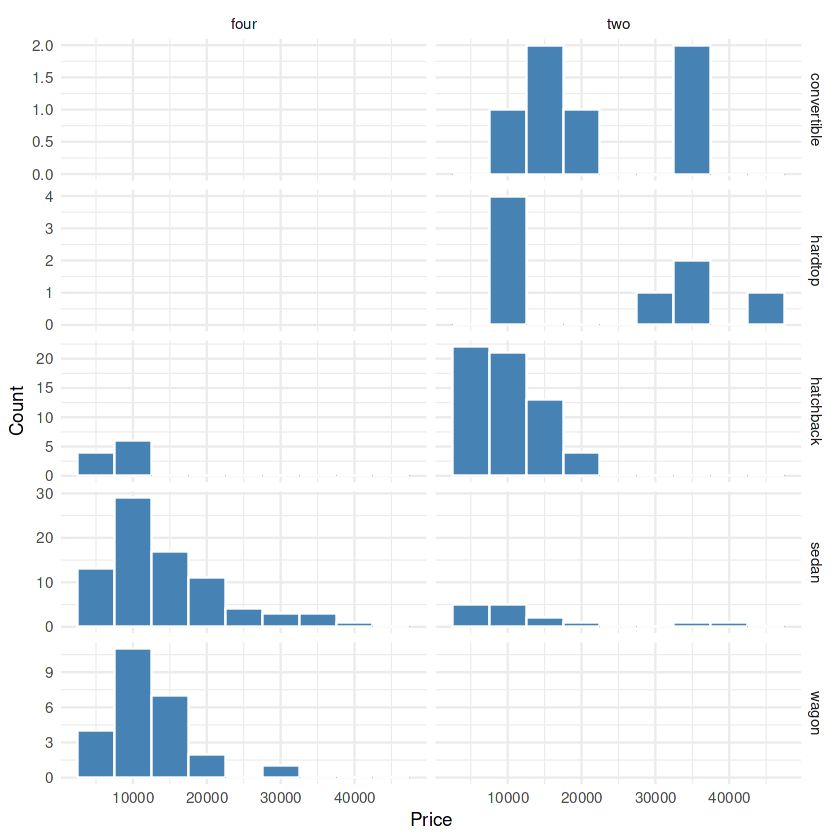

In [54]:
# Histograma con distribución de precios por los atributos "bodyStyle" y "nDoors" con escalas libres en el eje y
ggplot(carIns_final, aes(x = price)) +
  geom_histogram(binwidth = 5000, fill = "steelblue", color = "white") +
  facet_grid(bodyStyle ~ nDoors, scales = "free_y") +
  labs(x = "Price", y = "Count") +
  theme_minimal()
